# ALL IMPORTS 

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import math 

## Box Mueller Method 
Here we will be creating  IID standard gaussian processes using the Box Mueller Method :

Let 𝑈1, 𝑈2 be two independent uniform random variables on [0, 1]. Define the random variables (𝑍1, 𝑍2) as follows:

$$    𝑍_1 = \sqrt{-2 log 𝑈_1 }cos(2𝜋𝑈_2)  , 𝑍_2 = \sqrt{-2 log 𝑈_1} sin(2𝜋𝑈_2)   $$

The variables (𝑍1, 𝑍2) are then IID Gaussians .
  

In [10]:
n=10000
U1=np.random.uniform(size=(n,1))
U2=np.random.uniform(size=(n,1))
Z1=np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
Z2=np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)

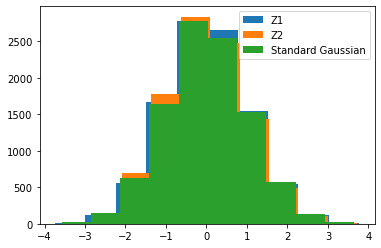

In [22]:
#Plotting Distributions 
standard_Gaussian=np.random.normal(size=(n,1))
plt.hist(Z1,label="Z1")
plt.hist(Z2,label="Z2")
plt.hist(standard_Gaussian,label="Standard Gaussian")
plt.legend(loc='upper right')
plt.show()

In [26]:
#Computing covariance of Z1 and Z2
covariance_Z1_Z2=float(np.sum(Z1*Z2,axis=0)/n)
print(covariance_Z1_Z2)

-0.0003853045380989984


The results confirm the Box Mueller method , Z1 and Z2 have the same distribution as the standard gaussian and are uncorrelated which makes Z1 and Z2 independent .

# Simulating Brownian motion
Here we will be simulating "d "paths of a brownian motion on [0,1] with discretization step "1 /n" using the Cholesky decomposition .

Let $(B_{j/100},j\in 0,..,100)$ be non-degenerate standard gaussian variables . there exists a matrix A and IID gaussian variables$(Z_{j/100},j\in 0,...,100)$ such that $ B=AZ$  , B is then a gaussian process with covariance matrix $ C = A. A^T$

In [38]:
#for this example n=100 AND d =100
n=100
d=100
#Creating the mean and covariance matrix of the brownian motion 
C=np.zeros(dtype=float,shape=(n,n))
m=np.zeros(dtype=float,shape=(n,1))
for i in range(1,n+1):
    for j in range(1,n+1):
        C[i-1,j-1]=min(i/n,j/n)
#Creating A the Cholesky decomposition of the covariance matrix 
A=np.linalg.cholesky(C)

In [64]:
#Creating a function that returns N samples of a standard gaussian distribution that are not IID

def standard_Gaussians(N):
    X=np.zeros(shape=(N,1))
    for i in range(N):
        X[i,0]=np.random.normal()
    return X
   

In [68]:
#Creating the Brownian motion 
Z=standard_Gaussians(n)
B=np.concatenate((np.zeros((1,1)),np.dot(A,Z)),axis=0)

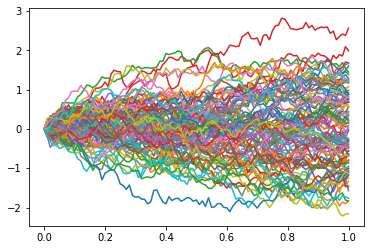

In [70]:
#Using a for loop to plot d paths
times=np.linspace(0.,1,n+1)
for i in range(d):
    Z=standard_Gaussians(n)
    B=np.concatenate((np.zeros((1,1)),np.dot(A,Z)),axis=0)
    plt.plot(times,B)

# Simulating Ornstein-Uhlenbeck process
We will be using the same approach to create d paths of the Ornstein-Uhlenbeck process and the stationary Ornstein-Uhlenbeck process.

The Ornstein-Uhlenbeck process:

(𝑌𝑡, 𝑡 ≥ 0) starting at 𝑌0 = 0 is the Gaussian process with mean E[𝑌𝑡] = 0 and covariance $ Cov(𝑌𝑠, 𝑌𝑡) = \frac{\exp{(−2(𝑡−𝑠))}}{2}(1 − 𝑒−2𝑠)$, for 𝑠 ≤ 𝑡.

The Stationary Ornstein-Uhlenbeck process:

$ 𝒞(𝑠, 𝑡) =\frac{\exp{(−2(𝑡−𝑠))}}{2}$, for 𝑠 ≤ 𝑡, with mean 0 (so that 𝑌0 is a Gaussian random variable of mean 0 and variance 1/2).

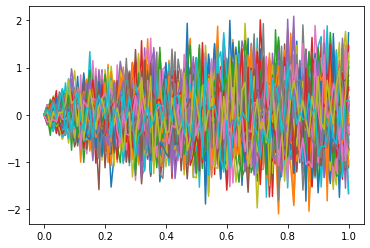

In [75]:
n=100
d=100
#Ornstein-Uhlenbeck process
#Creating the mean and covariance matrix of the brownian motion 
C=np.zeros(dtype=float,shape=(n,n))
m=np.zeros(dtype=float,shape=(n,1))
for i in range(1,n+1):
    for j in range(1,n+1):
        if(j>=i):
            C[i-1,j-1]=math.exp(-2*(j-i)/n)*(1-math.exp(-2*j/n))/2
#Creating A the Cholesky decomposition of the covariance matrix 
A=np.linalg.cholesky(C)
#plotting d paths 
times=np.linspace(0.,1,n+1)
for i in range(d):
    Z=standard_Gaussians(n)
    Y=np.concatenate((np.zeros((1,1)),np.dot(A,Z)),axis=0)
    plt.plot(times,Y)

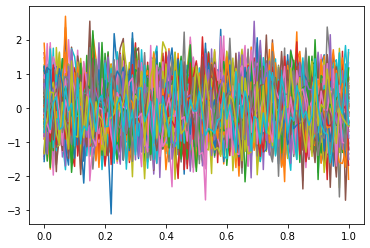

In [77]:
#Stationary Ornstein-Uhlenbeck process

#Creating the mean and covariance matrix of the brownian motion 
C=np.zeros(dtype=float,shape=(n,n))
m=np.zeros(dtype=float,shape=(n,1))
for i in range(1,n+1):
    for j in range(1,n+1):
        if(j>=i):
            C[i-1,j-1]=math.exp(-2*(j-i)/n)/2
#Creating A the Cholesky decomposition of the covariance matrix 
A=np.linalg.cholesky(C)
#plotting d paths 
times=np.linspace(0.,1,n+1)
for i in range(d):
    Z=standard_Gaussians(n)
    Y=np.concatenate((np.random.normal(0,math.sqrt(0.5),size=(1,1)),np.dot(A,Z)),axis=0)
    plt.plot(times,Y)

# Fractional Brownian motion 
We will be using the same approach to create d paths of the Fractional Brownian motion process for different index H values 0.1 0.5 and 0.9.

The fractional Brownian motion (𝐵(𝐻)𝑡,𝑡 ≥ 0) with index 𝐻, 0 < 𝐻 < 1 (called the Hurst index), is the Gaussian process with
mean 0 and covariance $Cov(𝑌𝑠, 𝑌𝑡) = E[𝐵(𝐻)𝑡 𝐵(𝐻)𝑠 ] = 1/2*(𝑡^{2𝐻} + 𝑠^{2𝐻} − |𝑡 − 𝑠|^{2𝐻})$.

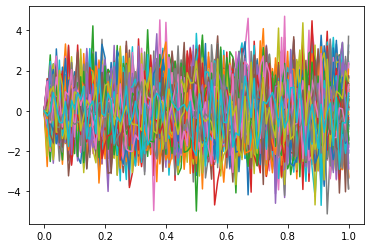

In [80]:
n=100
d=100
#Fractional Brownian motion 
#Creating the mean and covariance matrix of the brownian motion 
C=np.zeros(dtype=float,shape=(n,n))
m=np.zeros(dtype=float,shape=(n,1))
H=0.1
for i in range(1,n+1):
    for j in range(1,n+1):
        if(j>=i):
            C[i-1,j-1]=(i/n)**(2*H) +(j/n)**(2*H) -(abs((i-j)/n))**(2*H)
#Creating A the Cholesky decomposition of the covariance matrix 
A=np.linalg.cholesky(C)
#plotting d paths 
times=np.linspace(0.,1,n+1)
for i in range(d):
    Z=standard_Gaussians(n)
    BH=np.concatenate((np.zeros((1,1)),np.dot(A,Z)),axis=0)
    plt.plot(times,Y)

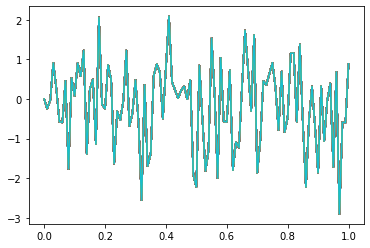

In [83]:
n=100
d=100
#Fractional Brownian motion 
#Creating the mean and covariance matrix of the brownian motion 
C=np.zeros(dtype=float,shape=(n,n))
m=np.zeros(dtype=float,shape=(n,1))
H=0.5
for i in range(1,n+1):
    for j in range(1,n+1):
        if(j>=i):
            C[i-1,j-1]=(i/n)**(2*H) +(j/n)**(2*H) -(abs((i-j)/n))**(2*H)
#Creating A the Cholesky decomposition of the covariance matrix 
A=np.linalg.cholesky(C)
#plotting d paths 
times=np.linspace(0.,1,n+1)
for i in range(d):
    Z=standard_Gaussians(n)
    BH=np.concatenate((np.zeros((1,1)),np.dot(A,Z)),axis=0)
    plt.plot(times,Y)

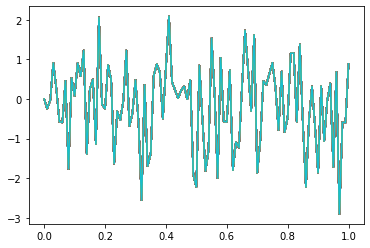

In [84]:
n=100
d=100
#Fractional Brownian motion 
#Creating the mean and covariance matrix of the brownian motion 
C=np.zeros(dtype=float,shape=(n,n))
m=np.zeros(dtype=float,shape=(n,1))
H=0.9
for i in range(1,n+1):
    for j in range(1,n+1):
        if(j>=i):
            C[i-1,j-1]=(i/n)**(2*H) +(j/n)**(2*H) -(abs((i-j)/n))**(2*H)
#Creating A the Cholesky decomposition of the covariance matrix 
A=np.linalg.cholesky(C)
#plotting d paths 
times=np.linspace(0.,1,n+1)
for i in range(d):
    Z=standard_Gaussians(n)
    BH=np.concatenate((np.zeros((1,1)),np.dot(A,Z)),axis=0)
    plt.plot(times,Y)